In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [3]:
### Explanatory Data Analysis ###

In [30]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 4, 31)

df = web.DataReader("GOOG", 'yahoo', start, end)
df.tail()

ModuleNotFoundError: No module named 'pandas_datareader'

In [31]:
df = pd.read_csv("GOOG.csv")
print(df.head())
# Making quarter label column
df.date = pd.to_datetime(df.Date, format = '%d/%m/%Y')

df['Quarter'] = df.date.dt.quarter 

df = df.set_index('Date')
print(df.head())


        Date    Close   Volume     Open       High        Low
0   4/9/2019  1181.41  1068968  1176.71  1183.4800  1171.0000
1   3/9/2019  1168.39  1480420  1177.03  1186.8900  1163.2000
2  30/8/2019  1188.10  1129959  1198.50  1198.5000  1183.8026
3  29/8/2019  1192.85  1088858  1181.12  1196.0600  1181.1200
4  28/8/2019  1171.02   802243  1161.71  1176.4199  1157.3000
             Close   Volume     Open       High        Low  Quarter
Date                                                               
4/9/2019   1181.41  1068968  1176.71  1183.4800  1171.0000        3
3/9/2019   1168.39  1480420  1177.03  1186.8900  1163.2000        3
30/8/2019  1188.10  1129959  1198.50  1198.5000  1183.8026        3
29/8/2019  1192.85  1088858  1181.12  1196.0600  1181.1200        3
28/8/2019  1171.02   802243  1161.71  1176.4199  1157.3000        3


C:\Users\Dominic Liman\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


q1 close mean 857.0181877022655
q2 close mean 825.1904736842108
q3 close mean 859.5597497252744
q4 close mean 823.4011356466873


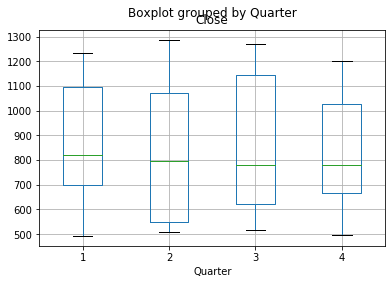

In [41]:
boxplot = df.boxplot(column=['Close'], by = "Quarter")

from statistics import mean
df.q1 =  df["Close"].where(df['Quarter']==1)
df.q2 =  df["Close"].where(df['Quarter']==2)
df.q3 =  df["Close"].where(df['Quarter']==3)
df.q4 =  df["Close"].where(df['Quarter']==4)
print("q1 close mean", df.q1.mean())
print("q2 close mean", df.q2.mean())
print("q3 close mean", df.q3.mean())
print("q4 close mean", df.q4.mean())

In [42]:
# Moving Average (MA) smooths out price data by creating a constantly updated average price. 
# This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average 
# could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect 
# it will follow the trend and less likely to deviate outside its resistance point.

close_px = df['Close']
mavg = close_px.rolling(window=100).mean()
mavg

Date
4/9/2019            NaN
3/9/2019            NaN
30/8/2019           NaN
29/8/2019           NaN
28/8/2019           NaN
27/8/2019           NaN
26/8/2019           NaN
23/8/2019           NaN
22/8/2019           NaN
21/8/2019           NaN
20/8/2019           NaN
19/8/2019           NaN
16/8/2019           NaN
15/8/2019           NaN
14/8/2019           NaN
13/8/2019           NaN
12/8/2019           NaN
9/8/2019            NaN
8/8/2019            NaN
7/8/2019            NaN
6/8/2019            NaN
5/8/2019            NaN
2/8/2019            NaN
1/8/2019            NaN
31/7/2019           NaN
30/7/2019           NaN
29/7/2019           NaN
26/7/2019           NaN
25/7/2019           NaN
24/7/2019           NaN
                ...    
8/5/2014     568.662389
7/5/2014     567.998389
6/5/2014     567.378789
5/5/2014     566.906289
2/5/2014     566.305689
1/5/2014     565.807889
30/4/2014    565.200789
29/4/2014    564.516989
28/4/2014    563.795789
25/4/2014    563.109889
24/4/2014  

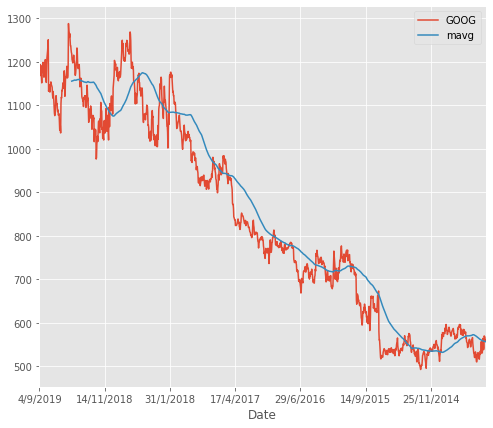

In [43]:
# Plotting the Moving Average

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='GOOG')
mavg.plot(label='mavg')
plt.legend()

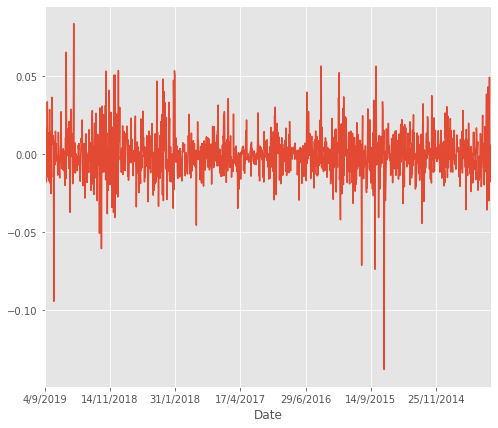

In [44]:
# Measure Expected Return

rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [46]:
# Creating lags 1 year back

# need to make a for loop function

df["close1"] = close_px.shift(-1)
df["close2"] = close_px.shift(-2)
df["close3"] = close_px.shift(-3)
df["close4"] = close_px.shift(-4)
df["close5"] = close_px.shift(-5)
df["close6"] = close_px.shift(-6)
df["close7"] = close_px.shift(-7)
df["close8"] = close_px.shift(-8)
df["close9"] = close_px.shift(-9)
df["close10"] = close_px.shift(-10)
df["close11"] = close_px.shift(-11)
df["close12"] = close_px.shift(-12)
df["close13"] = close_px.shift(-13)
df["close14"] = close_px.shift(-14)
df["close15"] = close_px.shift(-15)
df["close16"] = close_px.shift(-16)
df["close17"] = close_px.shift(-17)
df["close18"] = close_px.shift(-18)
df["close19"] = close_px.shift(-19)
df["close20"] = close_px.shift(-20)
df["close21"] = close_px.shift(-21)
df["close22"] = close_px.shift(-22)
df["close23"] = close_px.shift(-23)
df["close24"] = close_px.shift(-24)
df["close25"] = close_px.shift(-25)
df["close26"] = close_px.shift(-26)
df["close27"] = close_px.shift(-27)
df["close28"] = close_px.shift(-28)
df["close29"] = close_px.shift(-29)
df["close30"] = close_px.shift(-30)
df["close31"] = close_px.shift(-31)
df["close32"] = close_px.shift(-32)
df["close33"] = close_px.shift(-33)
df["close34"] = close_px.shift(-34)
df["close35"] = close_px.shift(-35)
df["close36"] = close_px.shift(-36)
df["close37"] = close_px.shift(-37)
df["close38"] = close_px.shift(-38)
df["close39"] = close_px.shift(-39)
df["close40"] = close_px.shift(-40)
df["close41"] = close_px.shift(-41)
df["close42"] = close_px.shift(-42)
df["close43"] = close_px.shift(-43)
df["close44"] = close_px.shift(-44)
df["close45"] = close_px.shift(-45)
df["close46"] = close_px.shift(-46)
df["close47"] = close_px.shift(-47)
df["close48"] = close_px.shift(-48)
df["close49"] = close_px.shift(-49)
df["close50"] = close_px.shift(-50)
df["close51"] = close_px.shift(-51)
df["close52"] = close_px.shift(-52)
df["close53"] = close_px.shift(-53)
df["close54"] = close_px.shift(-54)
df["close55"] = close_px.shift(-55)
df["close56"] = close_px.shift(-56)
df["close57"] = close_px.shift(-57)
df["close58"] = close_px.shift(-58)
df["close59"] = close_px.shift(-59)
df["close60"] = close_px.shift(-60)
df["close61"] = close_px.shift(-61)
df["close62"] = close_px.shift(-62)
df["close63"] = close_px.shift(-63)
df["close64"] = close_px.shift(-64)
df["close65"] = close_px.shift(-65)
df["close66"] = close_px.shift(-66)
df["close67"] = close_px.shift(-67)
df["close68"] = close_px.shift(-68)
df["close69"] = close_px.shift(-69)
df["close70"] = close_px.shift(-70)
df["close71"] = close_px.shift(-71)
df["close72"] = close_px.shift(-72)
df["close73"] = close_px.shift(-73)
df["close74"] = close_px.shift(-74)
df["close75"] = close_px.shift(-75)
df["close76"] = close_px.shift(-76)
df["close77"] = close_px.shift(-77)
df["close78"] = close_px.shift(-78)
df["close79"] = close_px.shift(-79)
df["close80"] = close_px.shift(-80)
df["close81"] = close_px.shift(-81)
df["close82"] = close_px.shift(-82)
df["close83"] = close_px.shift(-83)
df["close84"] = close_px.shift(-84)
df["close85"] = close_px.shift(-85)
df["close86"] = close_px.shift(-86)
df["close87"] = close_px.shift(-87)
df["close88"] = close_px.shift(-88)
df["close89"] = close_px.shift(-89)
df["close90"] = close_px.shift(-90)
df["close91"] = close_px.shift(-91)
df["close92"] = close_px.shift(-92)
df["close93"] = close_px.shift(-93)
df["close94"] = close_px.shift(-94)
df["close95"] = close_px.shift(-95)
df["close96"] = close_px.shift(-96)
df["close97"] = close_px.shift(-97)
df["close98"] = close_px.shift(-98)
df["close99"] = close_px.shift(-99)
df["close100"] = close_px.shift(-100)
df["close101"] = close_px.shift(-101)
df["close102"] = close_px.shift(-102)
df["close103"] = close_px.shift(-103)
df["close104"] = close_px.shift(-104)
df["close105"] = close_px.shift(-105)
df["close106"] = close_px.shift(-106)
df["close107"] = close_px.shift(-107)
df["close108"] = close_px.shift(-108)
df["close109"] = close_px.shift(-109)
df["close110"] = close_px.shift(-110)
df["close111"] = close_px.shift(-111)
df["close112"] = close_px.shift(-112)
df["close113"] = close_px.shift(-113)
df["close114"] = close_px.shift(-114)
df["close115"] = close_px.shift(-115)
df["close116"] = close_px.shift(-116)
df["close117"] = close_px.shift(-117)
df["close118"] = close_px.shift(-118)
df["close119"] = close_px.shift(-119)
df["close120"] = close_px.shift(-120)
df["close121"] = close_px.shift(-121)
df["close122"] = close_px.shift(-122)
df["close123"] = close_px.shift(-123)
df["close124"] = close_px.shift(-124)
df["close125"] = close_px.shift(-125)
df["close126"] = close_px.shift(-126)
df["close127"] = close_px.shift(-127)
df["close128"] = close_px.shift(-128)
df["close129"] = close_px.shift(-129)
df["close130"] = close_px.shift(-130)
df["close131"] = close_px.shift(-131)
df["close132"] = close_px.shift(-132)
df["close133"] = close_px.shift(-133)
df["close134"] = close_px.shift(-134)
df["close135"] = close_px.shift(-135)
df["close136"] = close_px.shift(-136)
df["close137"] = close_px.shift(-137)
df["close138"] = close_px.shift(-138)
df["close139"] = close_px.shift(-139)
df["close140"] = close_px.shift(-140)
df["close141"] = close_px.shift(-141)
df["close142"] = close_px.shift(-142)
df["close143"] = close_px.shift(-143)
df["close144"] = close_px.shift(-144)
df["close145"] = close_px.shift(-145)
df["close146"] = close_px.shift(-146)
df["close147"] = close_px.shift(-147)
df["close148"] = close_px.shift(-148)
df["close149"] = close_px.shift(-149)
df["close150"] = close_px.shift(-150)
df["close151"] = close_px.shift(-151)
df["close152"] = close_px.shift(-152)
df["close153"] = close_px.shift(-153)
df["close154"] = close_px.shift(-154)
df["close155"] = close_px.shift(-155)
df["close156"] = close_px.shift(-156)
df["close157"] = close_px.shift(-157)
df["close158"] = close_px.shift(-158)
df["close159"] = close_px.shift(-159)
df["close160"] = close_px.shift(-160)
df["close161"] = close_px.shift(-161)
df["close162"] = close_px.shift(-162)
df["close163"] = close_px.shift(-163)
df["close164"] = close_px.shift(-164)
df["close165"] = close_px.shift(-165)
df["close166"] = close_px.shift(-166)
df["close167"] = close_px.shift(-167)
df["close168"] = close_px.shift(-168)
df["close169"] = close_px.shift(-169)
df["close170"] = close_px.shift(-170)
df["close171"] = close_px.shift(-171)
df["close172"] = close_px.shift(-172)
df["close173"] = close_px.shift(-173)
df["close174"] = close_px.shift(-174)
df["close175"] = close_px.shift(-175)
df["close176"] = close_px.shift(-176)
df["close177"] = close_px.shift(-177)
df["close178"] = close_px.shift(-178)
df["close179"] = close_px.shift(-179)
df["close180"] = close_px.shift(-180)
df["close181"] = close_px.shift(-181)
df["close182"] = close_px.shift(-182)
df["close183"] = close_px.shift(-183)
df["close184"] = close_px.shift(-184)
df["close185"] = close_px.shift(-185)
df["close186"] = close_px.shift(-186)
df["close187"] = close_px.shift(-187)
df["close188"] = close_px.shift(-188)
df["close189"] = close_px.shift(-189)
df["close190"] = close_px.shift(-190)
df["close191"] = close_px.shift(-191)
df["close192"] = close_px.shift(-192)
df["close193"] = close_px.shift(-193)
df["close194"] = close_px.shift(-194)
df["close195"] = close_px.shift(-195)
df["close196"] = close_px.shift(-196)
df["close197"] = close_px.shift(-197)
df["close198"] = close_px.shift(-198)
df["close199"] = close_px.shift(-199)
df["close200"] = close_px.shift(-200)
df["close201"] = close_px.shift(-201)
df["close202"] = close_px.shift(-202)
df["close203"] = close_px.shift(-203)
df["close204"] = close_px.shift(-204)
df["close205"] = close_px.shift(-205)
df["close206"] = close_px.shift(-206)
df["close207"] = close_px.shift(-207)
df["close208"] = close_px.shift(-208)
df["close209"] = close_px.shift(-209)
df["close210"] = close_px.shift(-210)
df["close211"] = close_px.shift(-211)
df["close212"] = close_px.shift(-212)
df["close213"] = close_px.shift(-213)
df["close214"] = close_px.shift(-214)
df["close215"] = close_px.shift(-215)
df["close216"] = close_px.shift(-216)
df["close217"] = close_px.shift(-217)
df["close218"] = close_px.shift(-218)
df["close219"] = close_px.shift(-219)
df["close220"] = close_px.shift(-220)
df["close221"] = close_px.shift(-221)
df["close222"] = close_px.shift(-222)
df["close223"] = close_px.shift(-223)
df["close224"] = close_px.shift(-224)
df["close225"] = close_px.shift(-225)
df["close226"] = close_px.shift(-226)
df["close227"] = close_px.shift(-227)
df["close228"] = close_px.shift(-228)
df["close229"] = close_px.shift(-229)
df["close230"] = close_px.shift(-230)
df["close231"] = close_px.shift(-231)
df["close232"] = close_px.shift(-232)
df["close233"] = close_px.shift(-233)
df["close234"] = close_px.shift(-234)
df["close235"] = close_px.shift(-235)
df["close236"] = close_px.shift(-236)
df["close237"] = close_px.shift(-237)
df["close238"] = close_px.shift(-238)
df["close239"] = close_px.shift(-239)
df["close240"] = close_px.shift(-240)
df["close241"] = close_px.shift(-241)
df["close242"] = close_px.shift(-242)
df["close243"] = close_px.shift(-243)
df["close244"] = close_px.shift(-244)
df["close245"] = close_px.shift(-245)
df["close246"] = close_px.shift(-246)
df["close247"] = close_px.shift(-247)
df["close248"] = close_px.shift(-248)
df["close249"] = close_px.shift(-249)
df["close250"] = close_px.shift(-250)
df["close251"] = close_px.shift(-251)
df["close252"] = close_px.shift(-252)
df["close253"] = close_px.shift(-253)
df["close254"] = close_px.shift(-254)
df["close255"] = close_px.shift(-255)
df["close256"] = close_px.shift(-256)
df["close257"] = close_px.shift(-257)
df["close258"] = close_px.shift(-258)
df["close259"] = close_px.shift(-259)
df["close260"] = close_px.shift(-260)
df["close261"] = close_px.shift(-261)
df["close262"] = close_px.shift(-262)
df["close263"] = close_px.shift(-263)
df["close264"] = close_px.shift(-264)
df["close265"] = close_px.shift(-265)
df["close266"] = close_px.shift(-266)
df["close267"] = close_px.shift(-267)
df["close268"] = close_px.shift(-268)
df["close269"] = close_px.shift(-269)
df["close270"] = close_px.shift(-270)
df["close271"] = close_px.shift(-271)
df["close272"] = close_px.shift(-272)
df["close273"] = close_px.shift(-273)
df["close274"] = close_px.shift(-274)
df["close275"] = close_px.shift(-275)
df["close276"] = close_px.shift(-276)
df["close277"] = close_px.shift(-277)
df["close278"] = close_px.shift(-278)
df["close279"] = close_px.shift(-279)
df["close280"] = close_px.shift(-280)
df["close281"] = close_px.shift(-281)
df["close282"] = close_px.shift(-282)
df["close283"] = close_px.shift(-283)
df["close284"] = close_px.shift(-284)
df["close285"] = close_px.shift(-285)
df["close286"] = close_px.shift(-286)
df["close287"] = close_px.shift(-287)
df["close288"] = close_px.shift(-288)
df["close289"] = close_px.shift(-289)
df["close290"] = close_px.shift(-290)
df["close291"] = close_px.shift(-291)
df["close292"] = close_px.shift(-292)
df["close293"] = close_px.shift(-293)
df["close294"] = close_px.shift(-294)
df["close295"] = close_px.shift(-295)
df["close296"] = close_px.shift(-296)
df["close297"] = close_px.shift(-297)
df["close298"] = close_px.shift(-298)
df["close299"] = close_px.shift(-299)
df["close300"] = close_px.shift(-300)

# Drop missing value
dfreg = df.dropna()
print(dfreg)


             Close    Volume      Open       High        Low  Quarter  \
Date                                                                    
4/9/2019   1181.41   1068968  1176.710  1183.4800  1171.0000        3   
3/9/2019   1168.39   1480420  1177.030  1186.8900  1163.2000        3   
30/8/2019  1188.10   1129959  1198.500  1198.5000  1183.8026        3   
29/8/2019  1192.85   1088858  1181.120  1196.0600  1181.1200        3   
28/8/2019  1171.02    802243  1161.710  1176.4199  1157.3000        3   
27/8/2019  1167.84   1077452  1180.530  1182.4000  1161.4500        3   
26/8/2019  1168.89   1226441  1157.260  1169.4700  1152.9600        3   
23/8/2019  1151.29   1688271  1181.990  1194.0800  1147.7500        3   
22/8/2019  1189.53    947906  1194.070  1198.0115  1178.5800        3   
21/8/2019  1191.25    741053  1193.150  1199.0000  1187.4300        3   
20/8/2019  1182.69    915605  1195.250  1196.0600  1182.1100        3   
19/8/2019  1198.45   1232517  1190.090  1206.9900  

In [56]:
# Pre-processing & Splitting of 20 days lagged

X = dfreg.iloc[:,6:]
y = dfreg.iloc[:,0]

X_train = X.loc['2/11/2018':]
X_test = X.loc[:'2/11/2018']

X_train = X_train.values
X_test = X_test.values

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

y_train = y.loc['2/11/2018':]
y_test = y.loc[:'2/11/2018']

y_train = y_train.values
y_test = y_test.values

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((862, 300), (862,), (209, 300), (209,))

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [58]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

# cannot run

MemoryError: 

In [164]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [165]:
# accuracy of model with train set

confidencereg = clfreg.score(X_train, y_train)
confidencepoly2 = clfpoly2.score(X_train, y_train)
confidencepoly3 = clfpoly3.score(X_train, y_train)
confidenceknn = clfknn.score(X_train, y_train)

# results
print('The linear regression accuracy is', confidencereg)
print('The quadratic regression 2 accuracy is', confidencepoly2)
print('The quadratic regression 3 accuracy is', confidencepoly3)
print('The knn regression accuracy is', confidenceknn)

MemoryError: 

In [166]:
# accuracy of model with test set

confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

# results
print('The linear regression accuracy is', confidencereg)
print('The quadratic regression 2 accuracy is', confidencepoly2)
print('The quadratic regression 3 accuracy is', confidencepoly3)
print('The knn regression accuracy is', confidenceknn)

MemoryError: 

In [87]:
# rmse of model with test set

from sklearn.metrics import mean_squared_error
from math import sqrt

rmsereg = sqrt(mean_squared_error(y_test, clfreg.predict(X_test)))
rmsepoly2 = sqrt(mean_squared_error(y_test, clfpoly2.predict(X_test)))
rmsepoly3 = sqrt(mean_squared_error(y_test, clfpoly3.predict(X_test)))
rmseknn = sqrt(mean_squared_error(y_test, clfknn.predict(X_test)))

# results
print('The linear regression rmse is', rmsereg)
print('The quadratic regression 2 rmse is', rmsepoly2)
print('The quadratic regression 3 rmse is', rmsepoly3)
print('The knn regression rmse is', rmseknn)

The linear regression rmse is 20.767591273403706
The quadratic regression 2 rmse is 24.869078009001367
The quadratic regression 3 rmse is 41.403168877147195
The knn regression rmse is 19.439263481831293


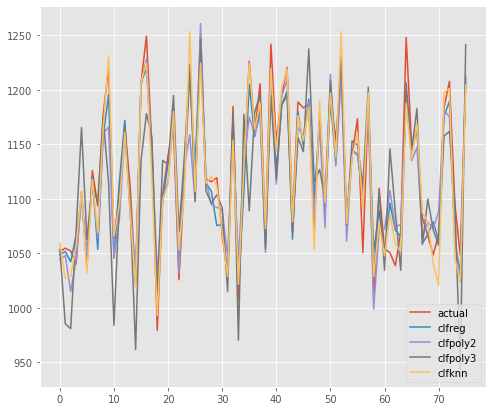

In [88]:
# plot of estimated and actual close price

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

y_test = pd.DataFrame(y_test)
y_clfreg = pd.DataFrame(clfreg.predict(X_test))
y_clfpoly2 = pd.DataFrame(clfpoly2.predict(X_test))
y_clfpoly3 = pd.DataFrame(clfpoly3.predict(X_test))
y_clfknn = pd.DataFrame(clfknn.predict(X_test))
plt.plot(y_test, label="actual")
plt.plot(y_clfreg, label="clfreg")
plt.plot(y_clfpoly2, label="clfpoly2")
plt.plot(y_clfpoly3, label="clfpoly3")
plt.plot(y_clfknn, label="clfknn")
plt.legend()

In [70]:
# Autocorrelation suggest that the model will be overfitted. Hence, we expect a high test rmse. 
# But when the model is applied to the test set,the test rmse is suprisingly quite low. 

# Why?! 
# Possible suggestions:
# - no. of data points is too low (?)

# Next step:
# - use 20 years historical data
# - match quarter to quarter data to take into account the seasonaility of the stock prices